<a href="https://colab.research.google.com/github/whitechocobread/Ai-project/blob/main/3%EC%A3%BC%EC%B0%A8/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **영어 Word2Vec 만들기**

파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있어, gensim 패키지를 이용하면 손쉽게 단어를 임베딩 벡터로 변환시킬 수 있습니다. 영어로 된 코퍼스를 다운받아 전처리를 수행하고, 전처리한 데이터를 바탕으로 Word2Vec 작업을 진행하겠습니다.

In [2]:
!pip install gensim


# **1**.훈련 데이터 로드하고 데이터 전처리하기

In [3]:
import re
import nltk
import urllib.request
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Download the data
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

# Load the XML file
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# Extract content between <content> and </content> tags
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Remove background noise like (Audio), (Laughter), etc. using regular expressions
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenize sentences using NLTK
nltk.download('punkt')
sent_text = sent_tokenize(content_text)

# Normalize text by removing punctuation and converting to lowercase
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# Tokenize words using NLTK
result = [word_tokenize(sentence) for sentence in normalized_text]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [5]:
# 샘플 3개만 출력: 토큰화가 수행되었음을 확인
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


# 3) Word2Vec 훈련시키기

In [6]:
# Train Word2Vec model
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)


vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [7]:
# man과 가장 유사한 단어들
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8441652059555054), ('guy', 0.8363739848136902), ('lady', 0.7725744843482971), ('girl', 0.7552304267883301), ('boy', 0.7523400783538818), ('gentleman', 0.7177937626838684), ('soldier', 0.7172906994819641), ('kid', 0.6867192983627319), ('poet', 0.6771447658538818), ('david', 0.6664743423461914)]


# 4) Word2Vec 모델 저장하고 로드하기

In [8]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

# **한국어 Word2Vec 만들기(네이버 영화 리뷰)**

In [9]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 49.7 MB/s eta 0:00:00


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [11]:
#네이버 영화 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7d801550ccd0>)

In [12]:
#데이터프레임으로 로드
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [13]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [14]:
# NULL(결측값) 값 존재 유무
print(train_data.isnull().values.any())

True


In [15]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [27]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [17]:
#규 표현식을 통해 한글이 아닌 경우 제거하는 전처리
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

<ipython-input-17-baca863a8a4d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [18]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [19:40<00:00, 169.44it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


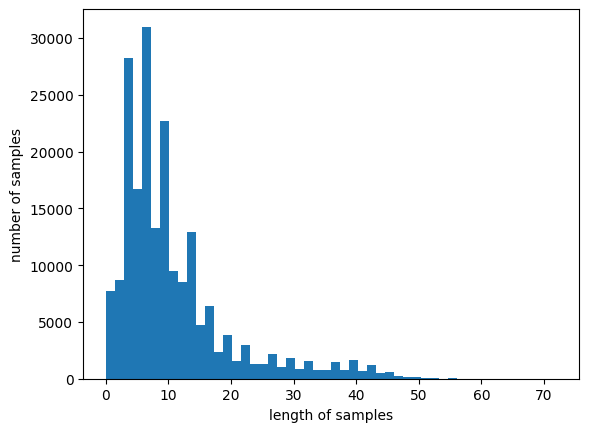

In [26]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
#Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터를 학습
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [21]:
# 완성된 임베딩 행렬의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [22]:
#'최민식'과 유사한 단어들을 뽑아봅시다.
print(model.wv.most_similar("최민식"))

[('안성기', 0.8375405669212341), ('설경구', 0.8311945796012878), ('한석규', 0.8284713625907898), ('박중훈', 0.8209909200668335), ('미스캐스팅', 0.8166958689689636), ('양동근', 0.8135516047477722), ('크리스찬', 0.8123753070831299), ('서영희', 0.8123539686203003), ('최민수', 0.8123116493225098), ('류덕환', 0.81158846616745)]


# **사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개**

구글이 제공하는 Pre-trained Word2Vec 모델을 사용하는 방법에 대해서 알아보겠습니다. 구글은 사전 훈련된 3백만 개의 Word2Vec 단어 벡터들을 제공합니다. 각 임베딩 벡터의 차원은 300입니다.  gensim을 통해서 이 모델을 불러오는 건 매우 간단합니다. 이 모델을 다운로드하고 파일 경로를 기재하면 됩니다.

모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

압축 파일의 용량은 약 1.5GB이지만, 파일의 압축을 풀면 약 3.3GB의 파일이 나옵니다.

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import gensim

# 모델 파일 경로 설정
model_path = "/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz"

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)


FileNotFoundError: ignored

In [ ]:
#모델의 크기(shape)를 확인해봅시다.
print(word2vec_model.vectors.shape)

모델의 크기는 3,000,000 x 300입니다. 즉, 3백만 개의 단어와 각 단어의 차원은 300입니다. 파일의 크기가 3기가가 넘는 이유를 계산해보면 아래와 같습니다.

3 million words * 300 features * 4bytes/feature = ~3.35GB
사전 훈련된 임베딩을 사용하여 두 단어의 유사도를 계산해봅시다.

In [ ]:
#두 단어의 유사도
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

In [ ]:
#단어 'book'의 벡터를 출력
print(word2vec_model['book'])